# Single Perceptron

Given a single neuron, can I separate binary classification points?

In [177]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("dark_background")

First lets create a simple dataset that can be easily separated with a line to classify 100% of the points.

In [208]:
np.random.seed(0)
N = 50
data_blob1 = np.random.randn(N//2, 2)
data_blob2 = np.random.randn(N//2, 2) - 5

X = np.vstack((data_blob1, data_blob2))
# Label the first blob as 1 and the second blob as 0
labels = np.vstack((np.ones((N//2,1)), -np.ones((N//2,1))))

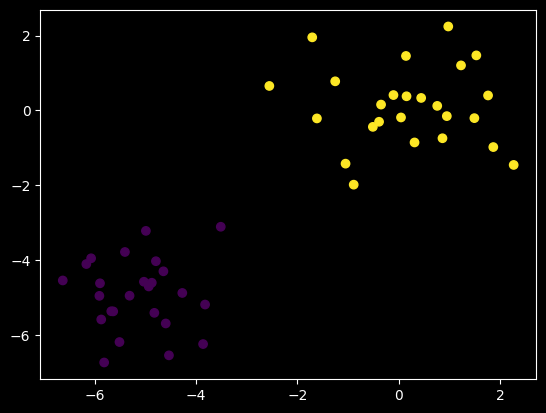

In [209]:
plt.scatter(X[:, 0], X[:, 1], c=labels)

Now pick some weights that affect the input to change the output.

In [210]:
w = np.ones((3,1))
w

array([[1.],
       [1.],
       [1.]])

And put a column of ones for a intercept

In [211]:
X = np.hstack((X, np.ones((N, 1))))
X

array([[ 1.76405235,  0.40015721,  1.        ],
       [ 0.97873798,  2.2408932 ,  1.        ],
       [ 1.86755799, -0.97727788,  1.        ],
       [ 0.95008842, -0.15135721,  1.        ],
       [-0.10321885,  0.4105985 ,  1.        ],
       [ 0.14404357,  1.45427351,  1.        ],
       [ 0.76103773,  0.12167502,  1.        ],
       [ 0.44386323,  0.33367433,  1.        ],
       [ 1.49407907, -0.20515826,  1.        ],
       [ 0.3130677 , -0.85409574,  1.        ],
       [-2.55298982,  0.6536186 ,  1.        ],
       [ 0.8644362 , -0.74216502,  1.        ],
       [ 2.26975462, -1.45436567,  1.        ],
       [ 0.04575852, -0.18718385,  1.        ],
       [ 1.53277921,  1.46935877,  1.        ],
       [ 0.15494743,  0.37816252,  1.        ],
       [-0.88778575, -1.98079647,  1.        ],
       [-0.34791215,  0.15634897,  1.        ],
       [ 1.23029068,  1.20237985,  1.        ],
       [-0.38732682, -0.30230275,  1.        ],
       [-1.04855297, -1.42001794,  1.   

And based on the perception algorithm output I can classify if given point is a 1 or a 0.

In [212]:
def model(x, w):
	# x is shaped (N, d)
	# w is shaped (d, 1)
	return np.sign(x@w)

In [213]:
model(X, w)

array([[ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [-1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [-1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [-1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.]])

I can either plot all possible points as the boundary, or I can solve for the decision boundary as a line. I think in the future being able to color all of them will be nice, so I'll just use that method since I've got the ocmpute

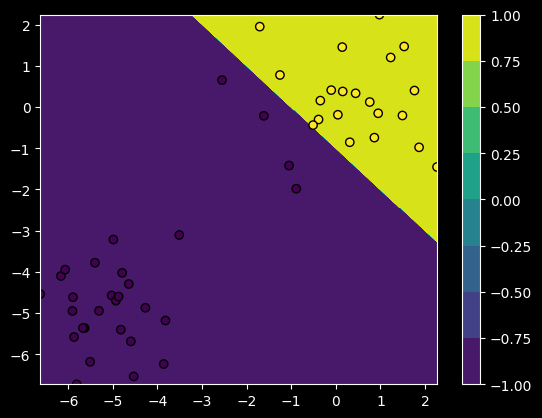

In [216]:
def plot_guess(X, w):
    minX = X.min(0)
    maxX = X.max(0)
    num_guesses_dim = 500
    x0, x1 = np.meshgrid(
        np.linspace(minX[0], maxX[0], num_guesses_dim),
        np.linspace(minX[1], maxX[1], num_guesses_dim)
    )
    _X = np.array([x0, x1]) # (2, d, d)
    _X = _X.transpose([1,2,0]) # (d, d, 2)
    _X = _X.reshape(-1, 2) # (d*d, 2)
    _X = np.hstack((_X, np.ones((num_guesses_dim*num_guesses_dim, 1))))

    guesses = model(_X, w) # (d*d, 1)
    guesses = guesses.reshape((num_guesses_dim, num_guesses_dim)) # (d,d)
    plt.contourf(x0, x1, guesses)
    plt.colorbar()

    # then just plot the train points too to see how we match
    plt.scatter(X[:, 0], X[:, 1], edgecolors="black", c=model(X, w))

plot_guess(X, w)

Now we can train and view the model as it changes!

The update step is very simple if the given forward pass is wrong, update the weight to bias the sum in the direction of the right answer.

So if wrong:

$w := w + y_i \cdot x_i$

ITER 1 Accuracy: 0.92
ITER 2 Accuracy: 0.92
ITER 3 Accuracy: 0.92
ITER 4 Accuracy: 0.92
ITER 5 Accuracy: 0.92
ITER 6 Accuracy: 0.92
ITER 7 Accuracy: 0.92
ITER 8 Accuracy: 0.92
ITER 9 Accuracy: 0.92
ITER 10 Accuracy: 0.92
ITER 11 Accuracy: 0.5
ITER 12 Accuracy: 0.52
ITER 13 Accuracy: 0.52
ITER 14 Accuracy: 0.52
ITER 15 Accuracy: 0.52
ITER 16 Accuracy: 0.52
ITER 17 Accuracy: 0.52
ITER 18 Accuracy: 0.52
ITER 19 Accuracy: 0.52
ITER 20 Accuracy: 0.52
ITER 21 Accuracy: 0.52
ITER 22 Accuracy: 0.52
ITER 23 Accuracy: 0.52
ITER 24 Accuracy: 0.52
ITER 25 Accuracy: 0.52
ITER 26 Accuracy: 0.84
ITER 27 Accuracy: 0.84
ITER 28 Accuracy: 0.84
ITER 29 Accuracy: 0.84
ITER 30 Accuracy: 0.84
ITER 31 Accuracy: 0.84
ITER 32 Accuracy: 0.84
ITER 33 Accuracy: 0.84
ITER 34 Accuracy: 0.84
ITER 35 Accuracy: 0.84
ITER 36 Accuracy: 0.84
ITER 37 Accuracy: 0.84
ITER 38 Accuracy: 0.84
ITER 39 Accuracy: 0.84
ITER 40 Accuracy: 0.84
ITER 41 Accuracy: 0.84
ITER 42 Accuracy: 0.84
ITER 43 Accuracy: 0.84
ITER 44 Accuracy: 0.8

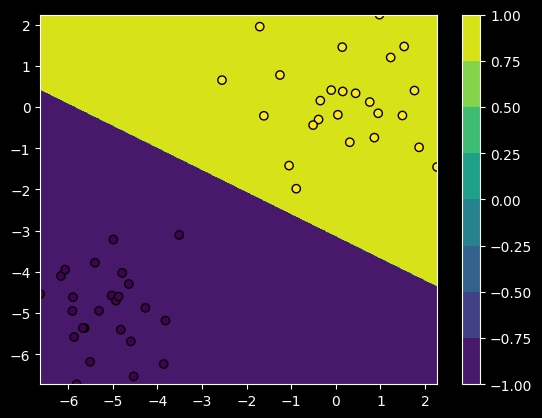

In [223]:
def accuracy(model, X, w, labels):
	correct = model(X, w) == labels
	return correct.mean()

def update_step(w, x_i, y_i, y_pred):
	if y_pred != y_i:
		w += (y_i*x_i).reshape(w.shape)
	return w


w = np.ones((3,1))
iter = 0
for _ in range(2):
	for i in range(N):
		x_i = X[i, :]
		y_i = labels[i, :]
		y_pred = model(x_i, w)
		w = update_step(w, x_i, y_i, y_pred)
		print("ITER", iter+1, "Accuracy:", accuracy(model, X, w, labels))
		iter += 1
plot_guess(X, w)